In [89]:
import warnings as wn
wn.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import datetime

In [90]:
house_data=pd.read_csv('kc_house_data.csv')

In [91]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [92]:
house_data.shape

(21613, 21)

In [93]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [94]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [95]:
house_data['Formatted Date']=pd.to_datetime(house_data['date'],utc=True)


In [96]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Formatted Date
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13 00:00:00+00:00
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09 00:00:00+00:00
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25 00:00:00+00:00
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09 00:00:00+00:00
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-21 00:00:00+00:00
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-23 00:00:00+00:00
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014-06-23 00:00:00+00:00
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015-01-16 00:00:00+00:00


In [97]:
house_data['Month']=house_data['Formatted Date'].dt.month

In [98]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Formatted Date,Month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13 00:00:00+00:00,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09 00:00:00+00:00,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25 00:00:00+00:00,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09 00:00:00+00:00,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18 00:00:00+00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-21 00:00:00+00:00,5
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-23 00:00:00+00:00,2
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014-06-23 00:00:00+00:00,6
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015-01-16 00:00:00+00:00,1


In [99]:
house_data.drop('date',axis=1,inplace=True)

In [100]:
house_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Formatted Date,Month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13 00:00:00+00:00,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09 00:00:00+00:00,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25 00:00:00+00:00,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09 00:00:00+00:00,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18 00:00:00+00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-21 00:00:00+00:00,5
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-23 00:00:00+00:00,2
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014-06-23 00:00:00+00:00,6
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015-01-16 00:00:00+00:00,1


In [101]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              21613 non-null  int64              
 1   price           21613 non-null  float64            
 2   bedrooms        21613 non-null  int64              
 3   bathrooms       21613 non-null  float64            
 4   sqft_living     21613 non-null  int64              
 5   sqft_lot        21613 non-null  int64              
 6   floors          21613 non-null  float64            
 7   waterfront      21613 non-null  int64              
 8   view            21613 non-null  int64              
 9   condition       21613 non-null  int64              
 10  grade           21613 non-null  int64              
 11  sqft_above      21613 non-null  int64              
 12  sqft_basement   21613 non-null  int64              
 13  yr_built        21613 non-null 

In [102]:
house_data['Year']=house_data['Formatted Date'].dt.year

In [103]:
house_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Formatted Date,Month,Year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13 00:00:00+00:00,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09 00:00:00+00:00,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25 00:00:00+00:00,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09 00:00:00+00:00,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18 00:00:00+00:00,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-21 00:00:00+00:00,5,2014
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-23 00:00:00+00:00,2,2015
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014-06-23 00:00:00+00:00,6,2014
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015-01-16 00:00:00+00:00,1,2015


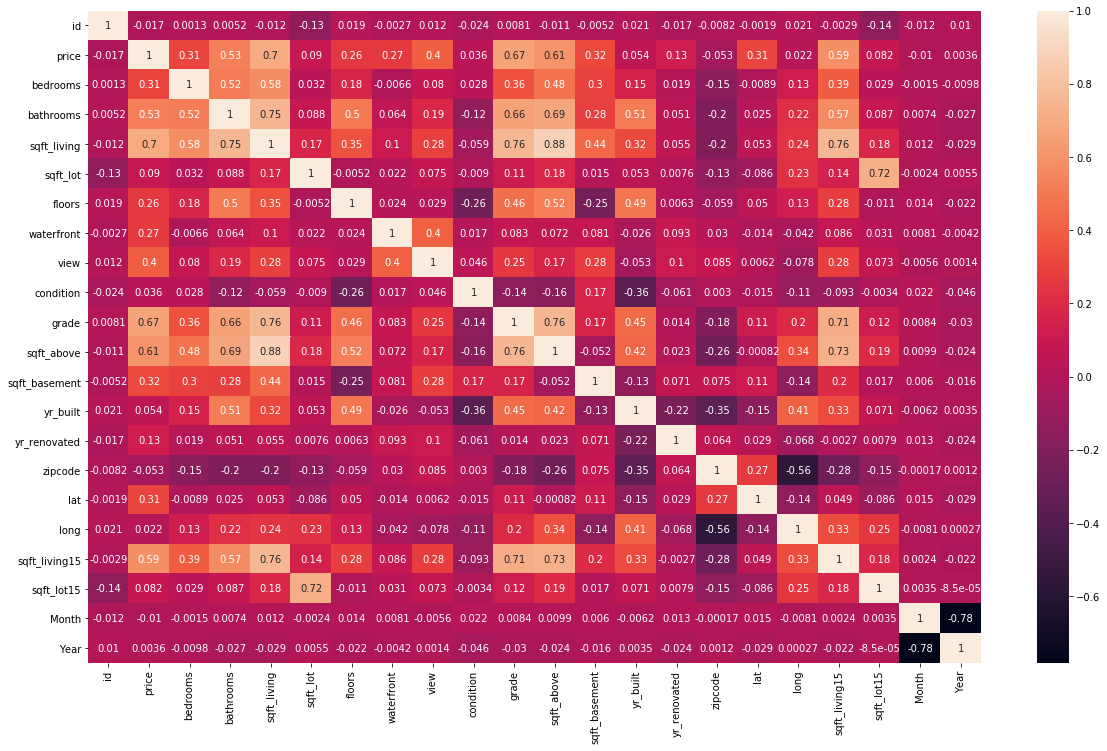

In [104]:
plt.figure(figsize=(20,12))
sns.heatmap(house_data.corr(),annot=True)

In [105]:
# Dropping of features that have less or no correlations with the target variable 'price'
house_data.drop('id',axis=1,inplace=True)
house_data.drop('Month',axis=1,inplace=True)
house_data.drop('Year',axis=1,inplace=True)
house_data.drop('sqft_lot',axis=1,inplace=True)
house_data.drop('condition',axis=1,inplace=True)
house_data.drop('yr_built',axis=1,inplace=True)
house_data.drop('zipcode',axis=1,inplace=True)
house_data.drop('long',axis=1,inplace=True)
house_data.drop('sqft_lot15',axis=1,inplace=True)
house_data.drop('Formatted Date',axis=1,inplace=True)

In [106]:
house_data.shape

(21613, 13)

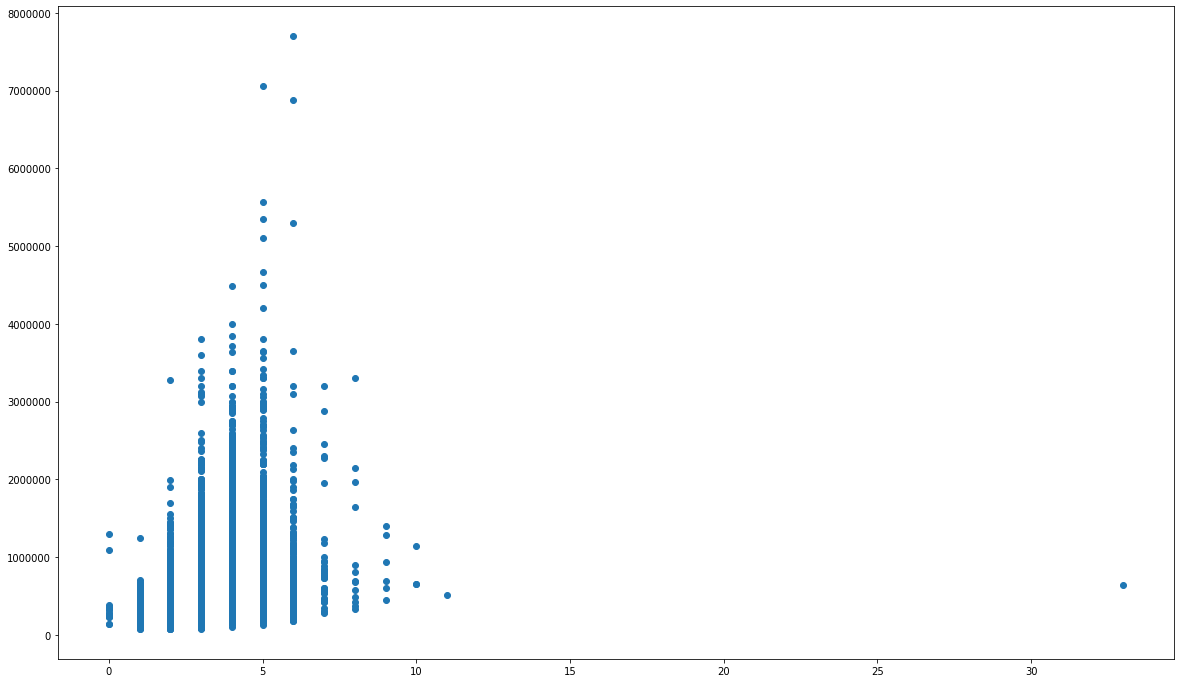

In [107]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['bedrooms'],house_data['price'])


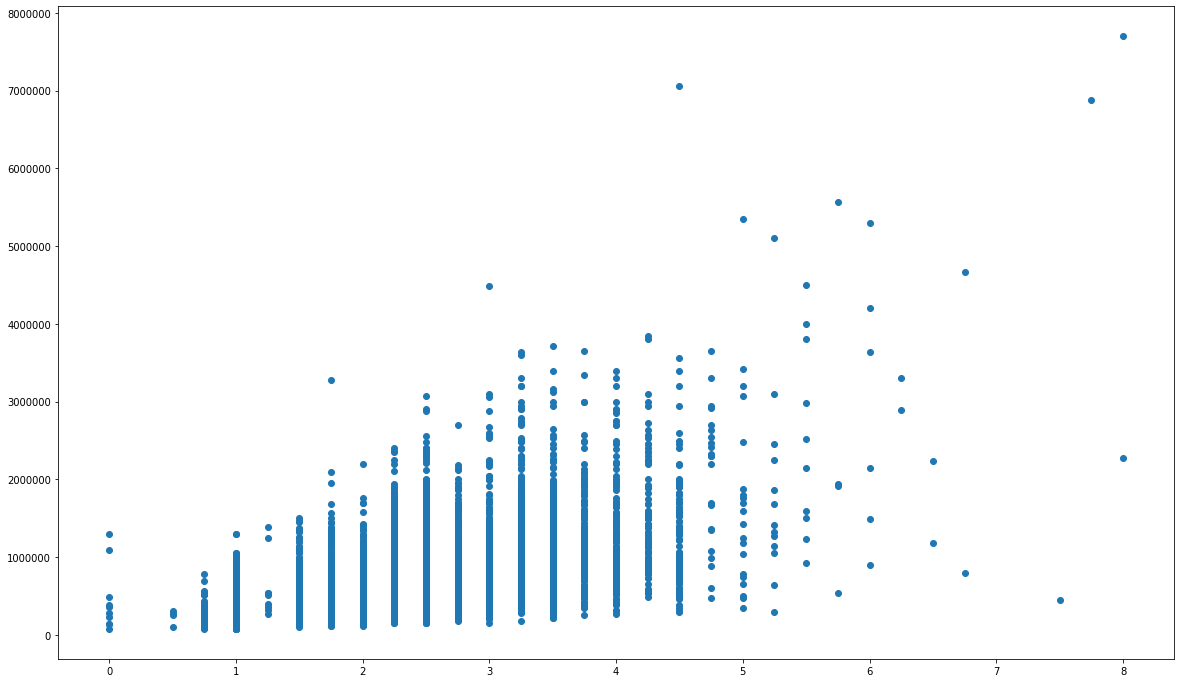

In [108]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['bathrooms'],house_data['price'])

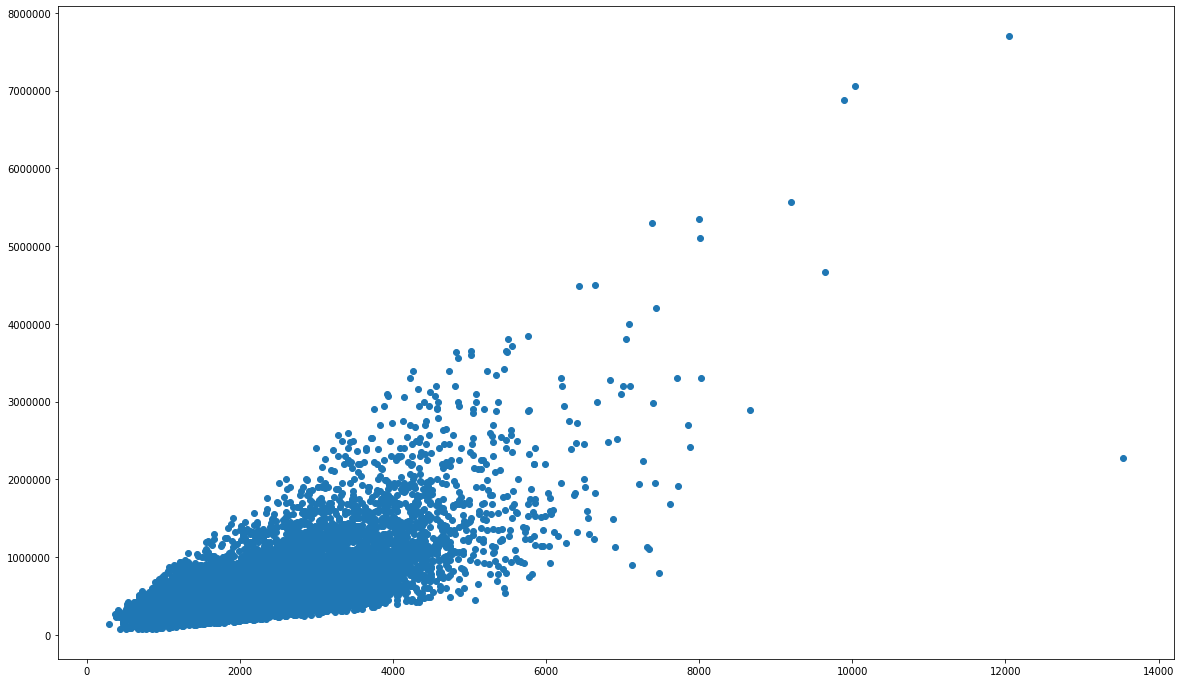

In [109]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['sqft_living'],house_data['price'])

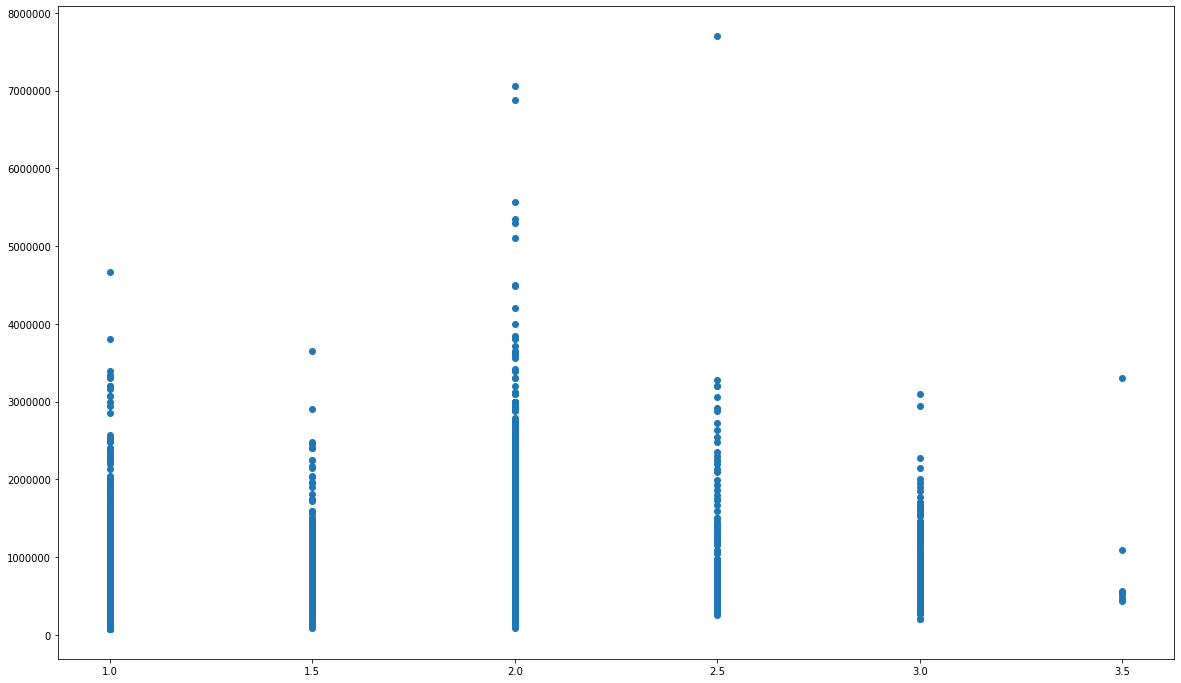

In [110]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['floors'],house_data['price'])

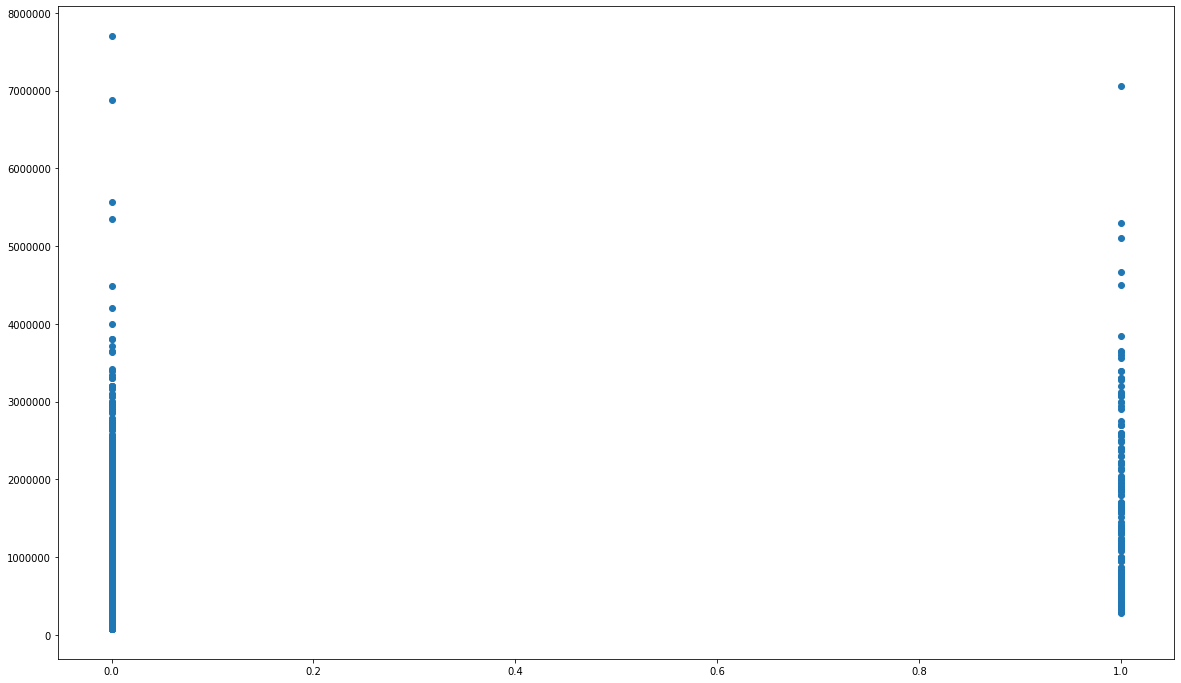

In [111]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['waterfront'],house_data['price'])

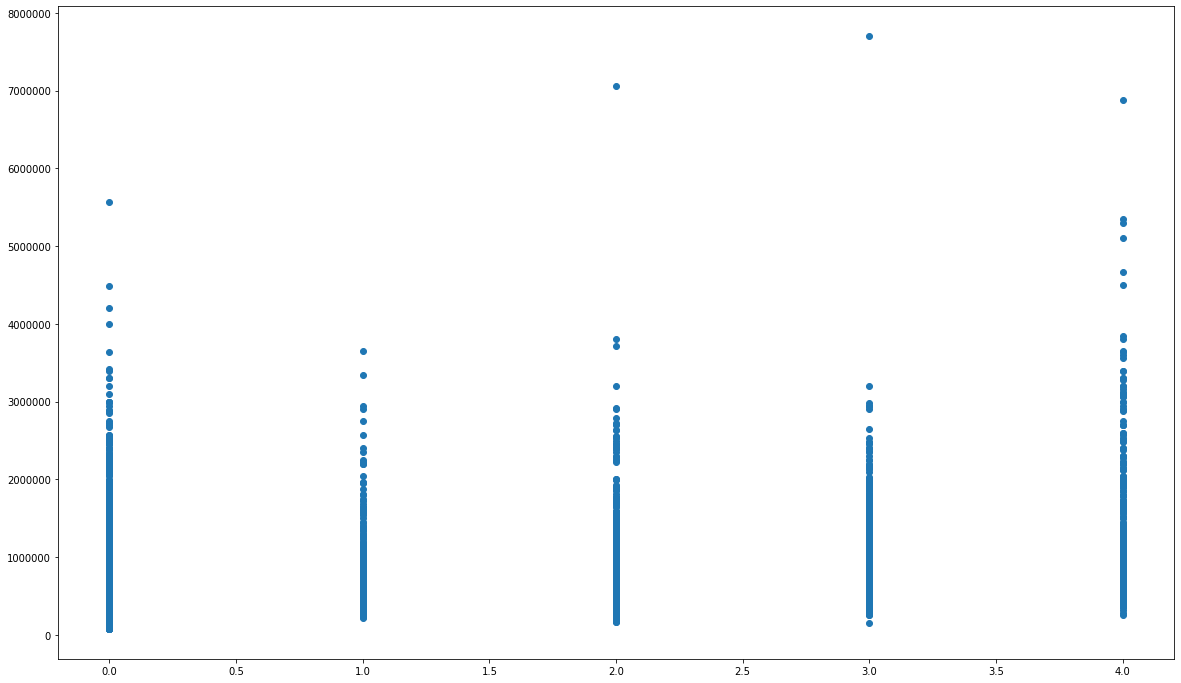

In [112]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['view'],house_data['price'])

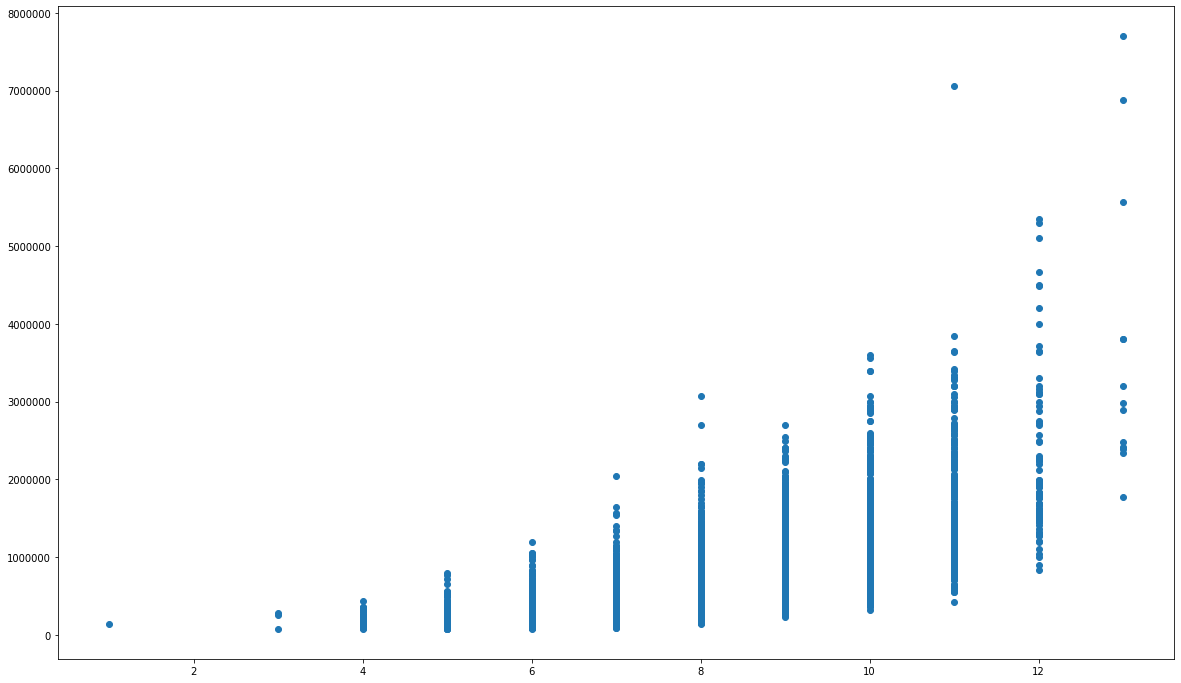

In [113]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['grade'],house_data['price'])

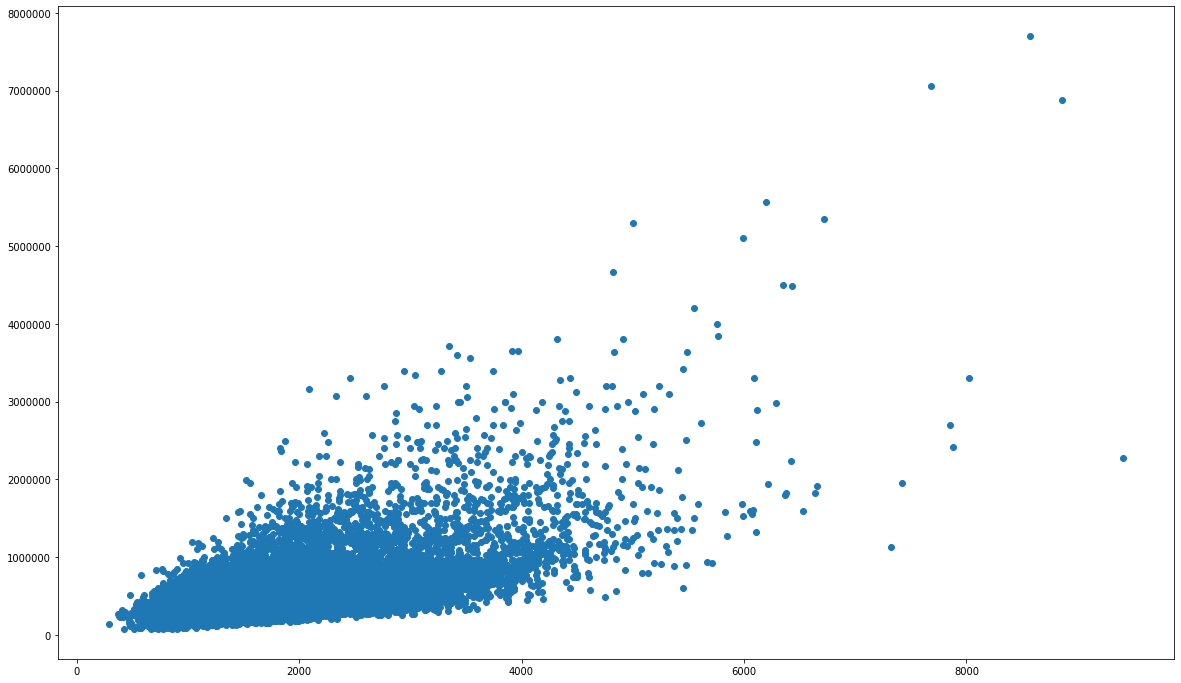

In [114]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['sqft_above'],house_data['price'])

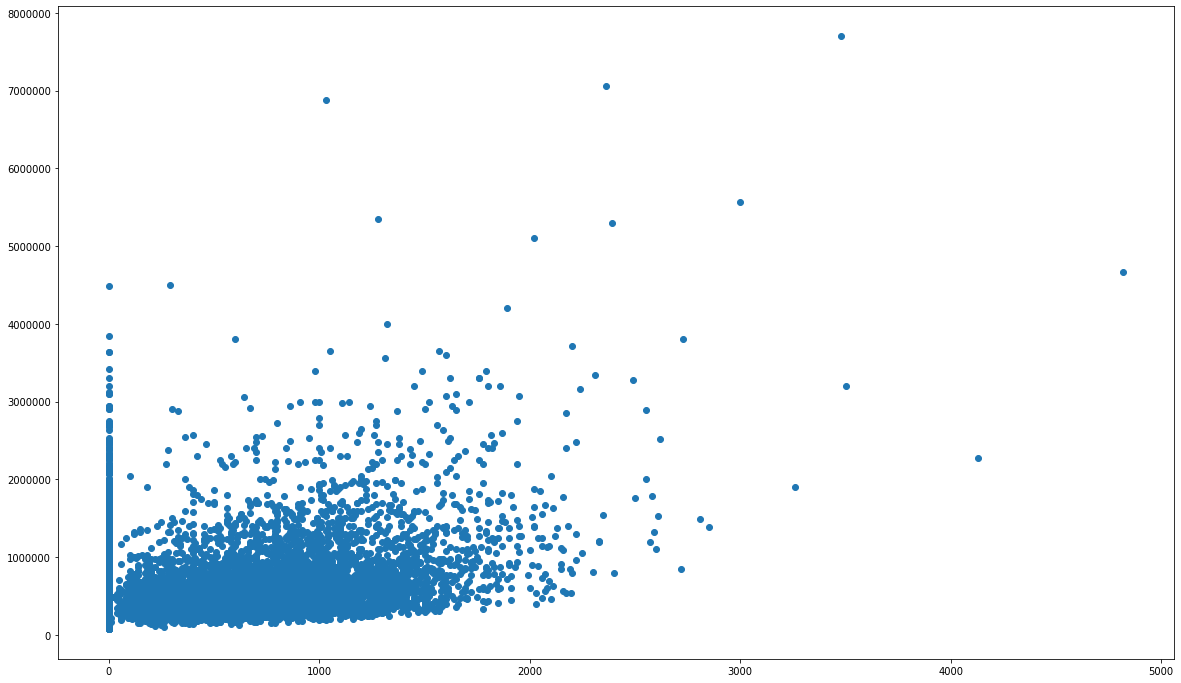

In [115]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['sqft_basement'],house_data['price'])

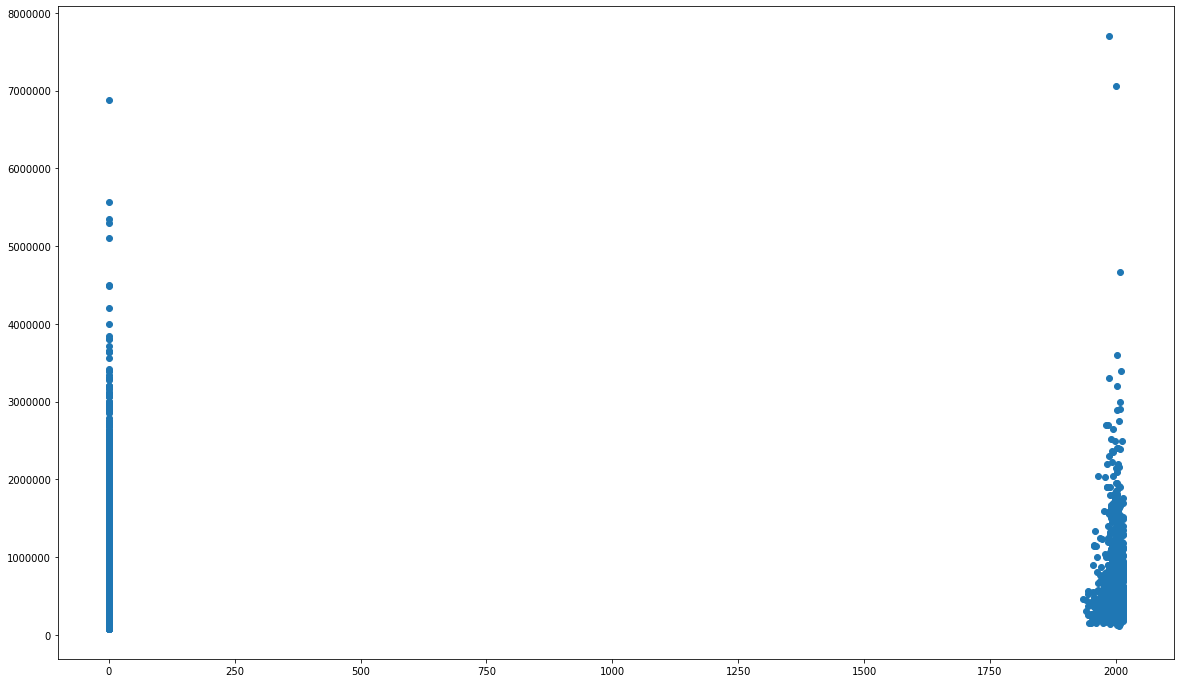

In [116]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['yr_renovated'],house_data['price'])

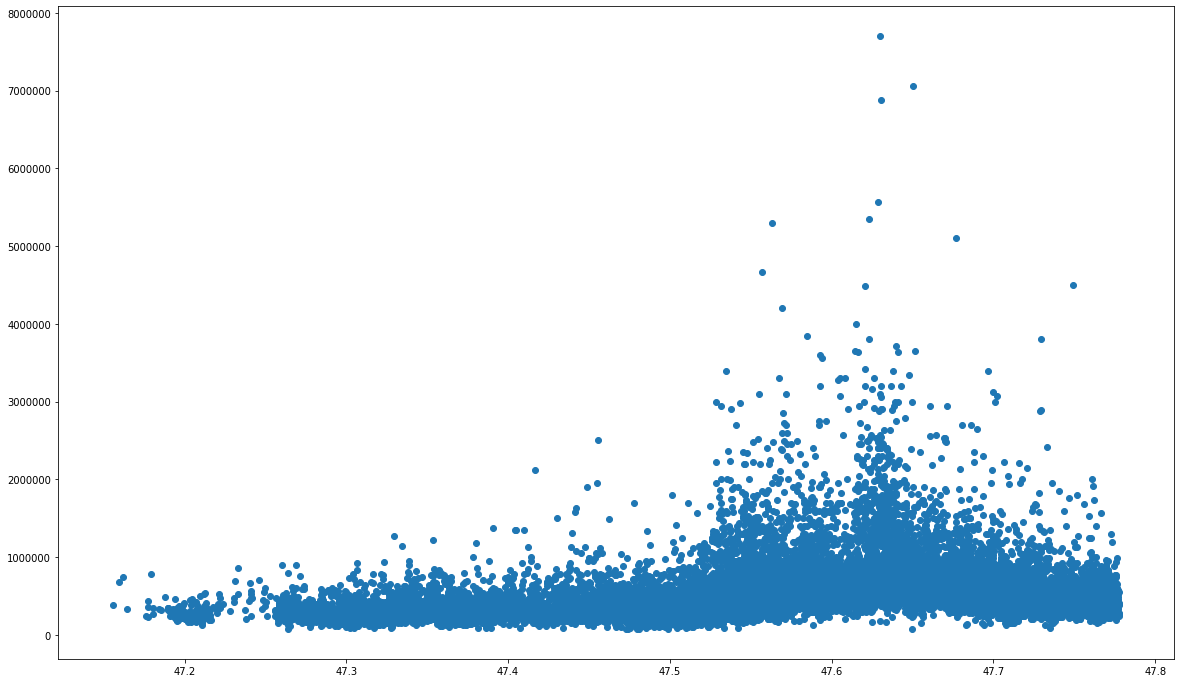

In [117]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['lat'],house_data['price'])

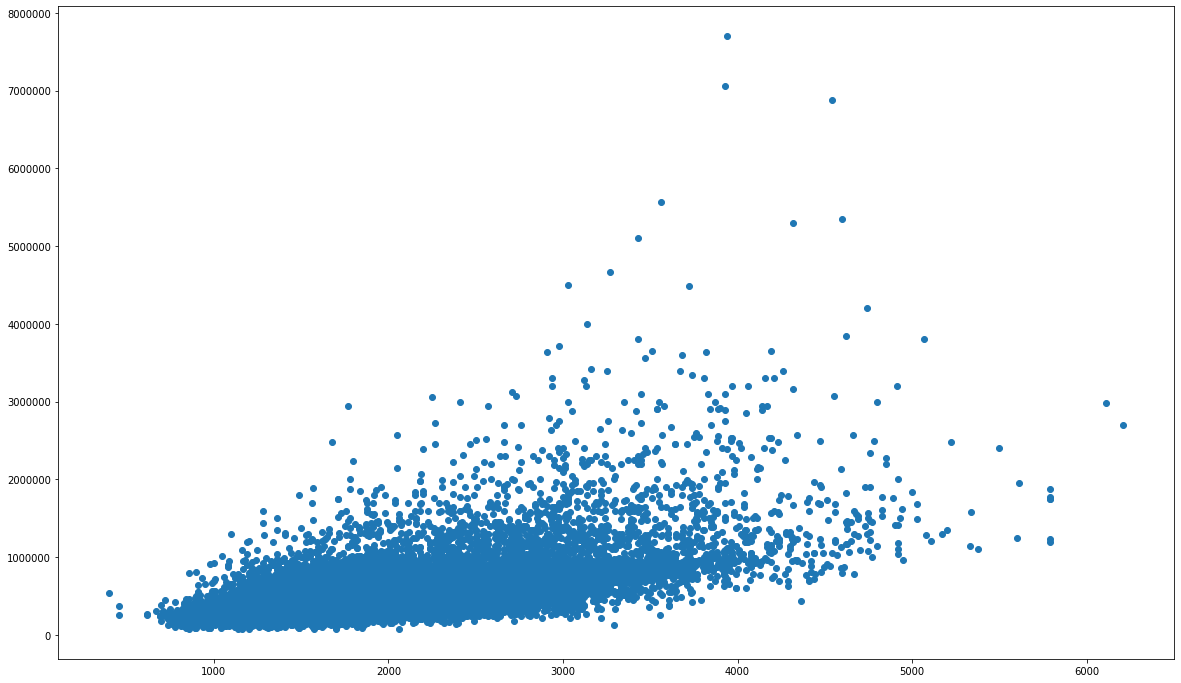

In [118]:
plt.figure(figsize=(20,12))
plt.scatter(house_data['sqft_living15'],house_data['price'])

In [119]:
index_drop = house_data[(house_data.bedrooms>15) &(house_data.price>7000000)].index
index_drop=np.append(index_drop,house_data[(house_data.bathrooms>7)].index)
index_drop=np.append(index_drop,house_data[(house_data.sqft_living>10000)].index)
index_drop=np.append(index_drop,house_data[(house_data.sqft_above>8000)].index)
index_drop=np.append(index_drop,house_data[(house_data.sqft_basement>4000)].index)
index_drop=np.append(index_drop,house_data[(house_data.sqft_living15>6000)].index)
index_drop = np.unique(index_drop)
index_drop = index_drop[index_drop < 21613] 
df = house_data.drop(index_drop).reset_index(drop=True)
print("{} examples in the training set are dropped.".format(len(index_drop)))

9 examples in the training set are dropped.


In [120]:
house_data.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
floors            0.616177
waterfront       11.385108
view              3.395750
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_renovated      4.549493
lat              -0.485270
sqft_living15     1.108181
dtype: float64

In [121]:
# All features are skewed.
house_data_col = house_data.columns
for c in house_data_col:
    house_data[c]=np.log1p(house_data[[c]])

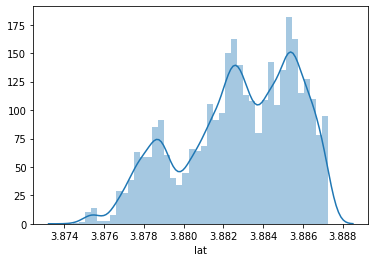

In [122]:
sns.distplot(house_data['lat'])

In [123]:
y=house_data.pop('price')
x=house_data


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)

In [125]:
from sklearn.metrics import r2_score
r2_realscore=r2_score(y_test, y_predict)
df_best = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

In [126]:
r2_realscore

0.7329276284633204

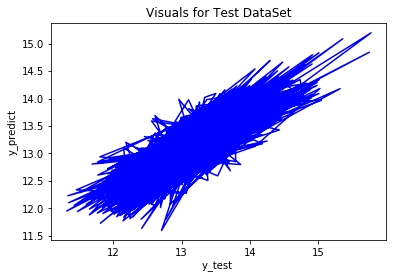

In [127]:
#plt.scatter(x_test, y_test, color= 'red')
plt.plot(y_test, y_predict, color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("y_test ")
plt.ylabel("y_predict")
plt.show()

In [128]:
df_best

,Actual,Predicted
19836,12.560248,12.764880
10442,12.388190,12.364032
20548,13.038984,13.096188
11014,12.892953,13.100548
4138,13.208543,13.180924
...,...,...
5828,13.028055,13.135760
9478,13.652993,13.395945
13086,13.475835,13.553322
19162,13.038984,12.932487


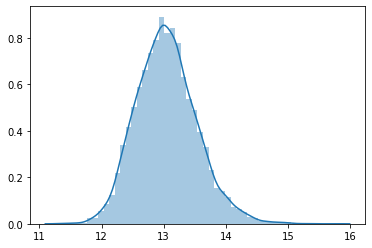

In [129]:
sns.distplot(df_best)

In [130]:
df_best.skew()

Actual       0.458780
Predicted    0.262495
dtype: float64